<a href="https://colab.research.google.com/github/aukabir/Machine_Learning_Project_2/blob/main/MLproject_2_diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About this project:
1. The objective of this project is to classify whether someone has diabetes or not.
2. Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)
3. The independent variables in this data set are :-'Age', 'gender','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level','diabetes'.
4. The value of outcome variable 'diabetes' is either 1 or 0 indicating whether a person has diabetes(1) or not(0).


---



# 1. Environment setup

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
import sklearn

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

# 2. Load and understanding data

**About Dataset**
The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. ✈

2.1 Loading the dataset from Google Drive

In [58]:
data = pd.read_csv('/content/drive/MyDrive/DataBank for ML study circle/diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


2.2 Understanding the dataset

In [14]:
display(data.sample(3))

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
29052,Female,65.0,0,0,never,25.03,8.2,126,1
2554,Female,79.0,0,0,not current,18.09,7.0,240,1
20160,Male,12.0,0,0,No Info,27.32,5.0,126,0


In [15]:
display(data.shape)

(100000, 9)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [17]:
display(data.columns) #learning about the columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [18]:
display(data.groupby('diabetes').size())

diabetes
0    91500
1     8500
dtype: int64

In [ ]:
# For Data Summarizing, group by 2 categorical & 2 Numerical variable
data.groupby(['gender', 'smoking_history'])['age', 'bmi'].agg([np.mean, np.median])

In [32]:
# Cross tabulation of 2 variable with Total
display(pd.crosstab(data.gender,data.smoking_history,margins=True, margins_name="Total", normalize = False).style.background_gradient(cmap='summer_r'))

smoking_history,No Info,current,ever,former,never,not current,Total
gender,,,,,,,
Female,19700,5058,2238,4774,22869,3913,58552
Male,16110,4228,1765,4578,12223,2526,41430
Other,6,0,1,0,3,8,18
Total,35816,9286,4004,9352,35095,6447,100000


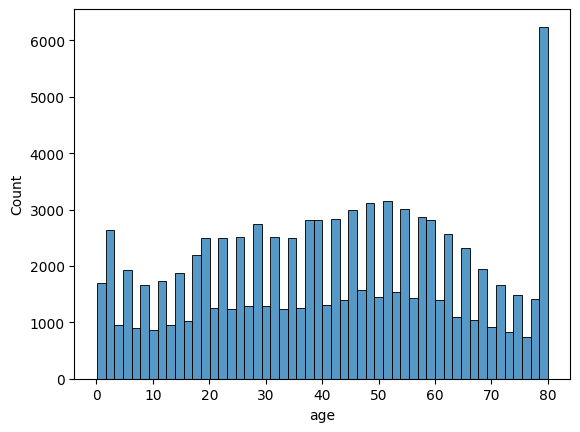

In [45]:
sns.histplot(x='age', data=data)
plt. show()

<Axes: xlabel='age'>

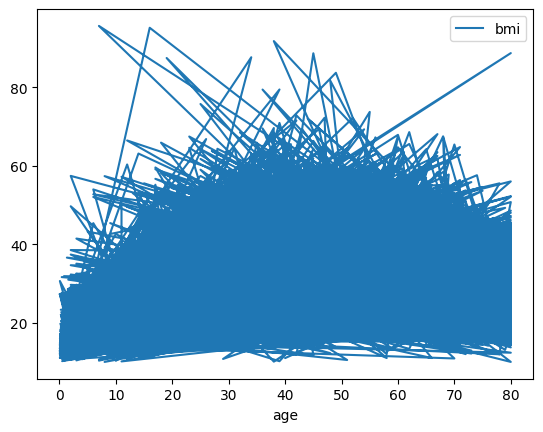

In [42]:
display(data.plot(x = 'age', y = 'bmi'))

<Axes: xlabel='age', ylabel='bmi'>

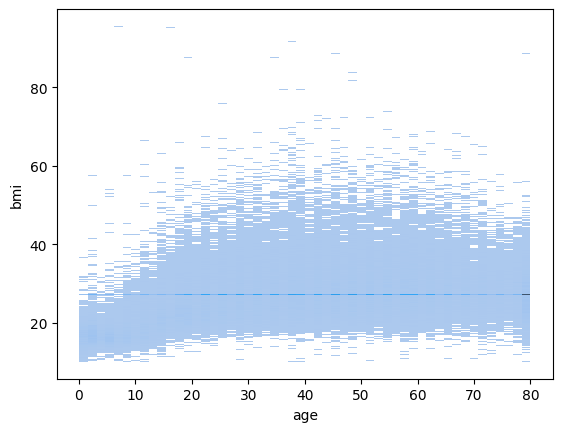

In [41]:
display(sns.histplot(x='age',y = 'bmi', data=data))

In [ ]:
print('#Five number summary of Data:')
display(data.describe().T)

#Five number summary of Data:


,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


Interpretation:

We observe that minimum value of some columns is 0 which cannot be possible medically.Hence in the data cleaning process we'll have to replace them with mean/median value depending on the distribution. Also in the maximum column we can see bmi levels as high as 95.69! and blood_glucose_level 300! We have to treat outliers.

In [ ]:
# show how many column has 0 values and sum it

featureList = ['hypertension', 'heart_disease']
print(data[featureList].isin({0}).sum())

hypertension     92515
heart_disease    96058
dtype: int64


In [ ]:
display(data.sample(7))

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
21203,Female,41.0,0,0,former,15.46,3.5,126,0
9293,Female,47.0,0,0,not current,27.32,6.2,100,0
15220,Female,56.0,0,0,former,30.46,5.8,145,0
38319,Male,66.0,0,0,ever,25.43,6.5,85,0
82009,Female,23.0,0,0,No Info,24.84,6.5,85,0
28898,Female,80.0,0,0,never,26.00,5.0,158,0
53787,Male,74.0,0,0,No Info,30.02,6.0,155,0


In [ ]:
# gender :
data['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

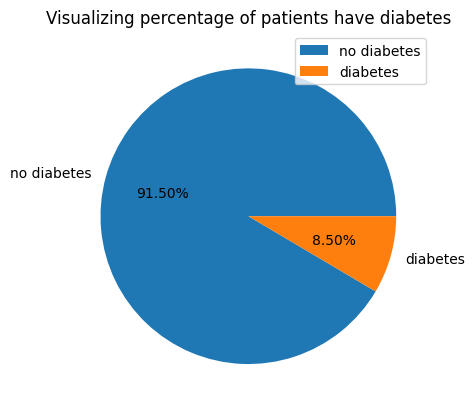

In [46]:
plt.pie((list(data['diabetes'].value_counts().values)), labels = ['no diabetes', 'diabetes'],autopct='%1.2f%%');
plt.legend();
plt.title('Visualizing percentage of patients have diabetes');

In [47]:
data['HbA1c_level'].value_counts()

6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7471
8.8     661
8.2     661
9.0     654
7.5     643
6.8     642
7.0     634
Name: HbA1c_level, dtype: int64

<Axes: xlabel='HbA1c_level', ylabel='Count'>

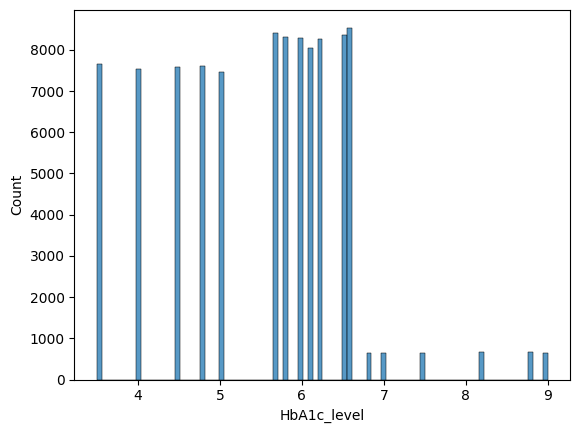

In [48]:
sns.histplot(x='HbA1c_level', data= data)

1. HbA1c_level vs. diabetes

* A hemoglobin A1C (HbA1C) test is a blood test that shows what your average blood sugar (glucose) level was over the past two to three months.

* we will create a new feature bassed on the value of (HbA1C)

If HbA1c level	< 5.7 initial diagnosis Normal

If HbA1c level	5.7 - 6.4 initial diagnosis Prediabetes

If HbA1c level	>= 6.5 initial diagnosis Diabetes

Reference: https://www.cdc.gov/diabetes/managing/managing-blood-sugar/a1c.html

In [59]:
#Creating new Categorical feature (initial_diagnosis) based on Numerical feature (HbA1c level)
initial_diagnosis = []
for value in data['HbA1c_level']:
    if value < 5.7:
        initial_diagnosis.append('normal')
    elif (5.7 <= value) and (value <= 6.4):
        initial_diagnosis.append('prediabetes')
    elif (value >= 6.5):
        initial_diagnosis.append('diabetes')

data['initial_diagnosis'] = initial_diagnosis

In [ ]:
data.sample(2)

# 3. Data Cleaning
* Dropping duplicate values
* Checking NULL values
* Checking for 0 value and replacing it :- It isn't medically possible for some data record to have 0 value such as Blood Pressure or Glucose levels. Hence we replace them with the mean value of that particular column.

In [ ]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
data.drop_duplicates()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
#check for missing values, count them and print the sum for every column
data.isnull().sum() #conclusion :- there are no null values in this dataset

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
# creat a subset (0-10 Rows and 4-5 Columns)
data.iloc[:10, 3:5]

In [ ]:
# Creating subset with specific rows and columns (Rows: 300,400,500,600; Columns: age, gender, diabetes)
data.loc[[300,400,500,600], ['age','gender','diabetes']]

# 4. Data Insights

In [60]:
#Seperate categorical and Numerical columns
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['gender', 'smoking_history', 'initial_diagnosis'], dtype='object')
Numerical Variables:
['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


In [ ]:
#Crosstab of two Categorical columns
pd.crosstab(data.gender,data.smoking_history,margins=True).style.background_gradient(cmap='summer_r')

smoking_history,No Info,current,ever,former,never,not current,All
gender,,,,,,,
Female,19700,5058,2238,4774,22869,3913,58552
Male,16110,4228,1765,4578,12223,2526,41430
Other,6,0,1,0,3,8,18
All,35816,9286,4004,9352,35095,6447,100000


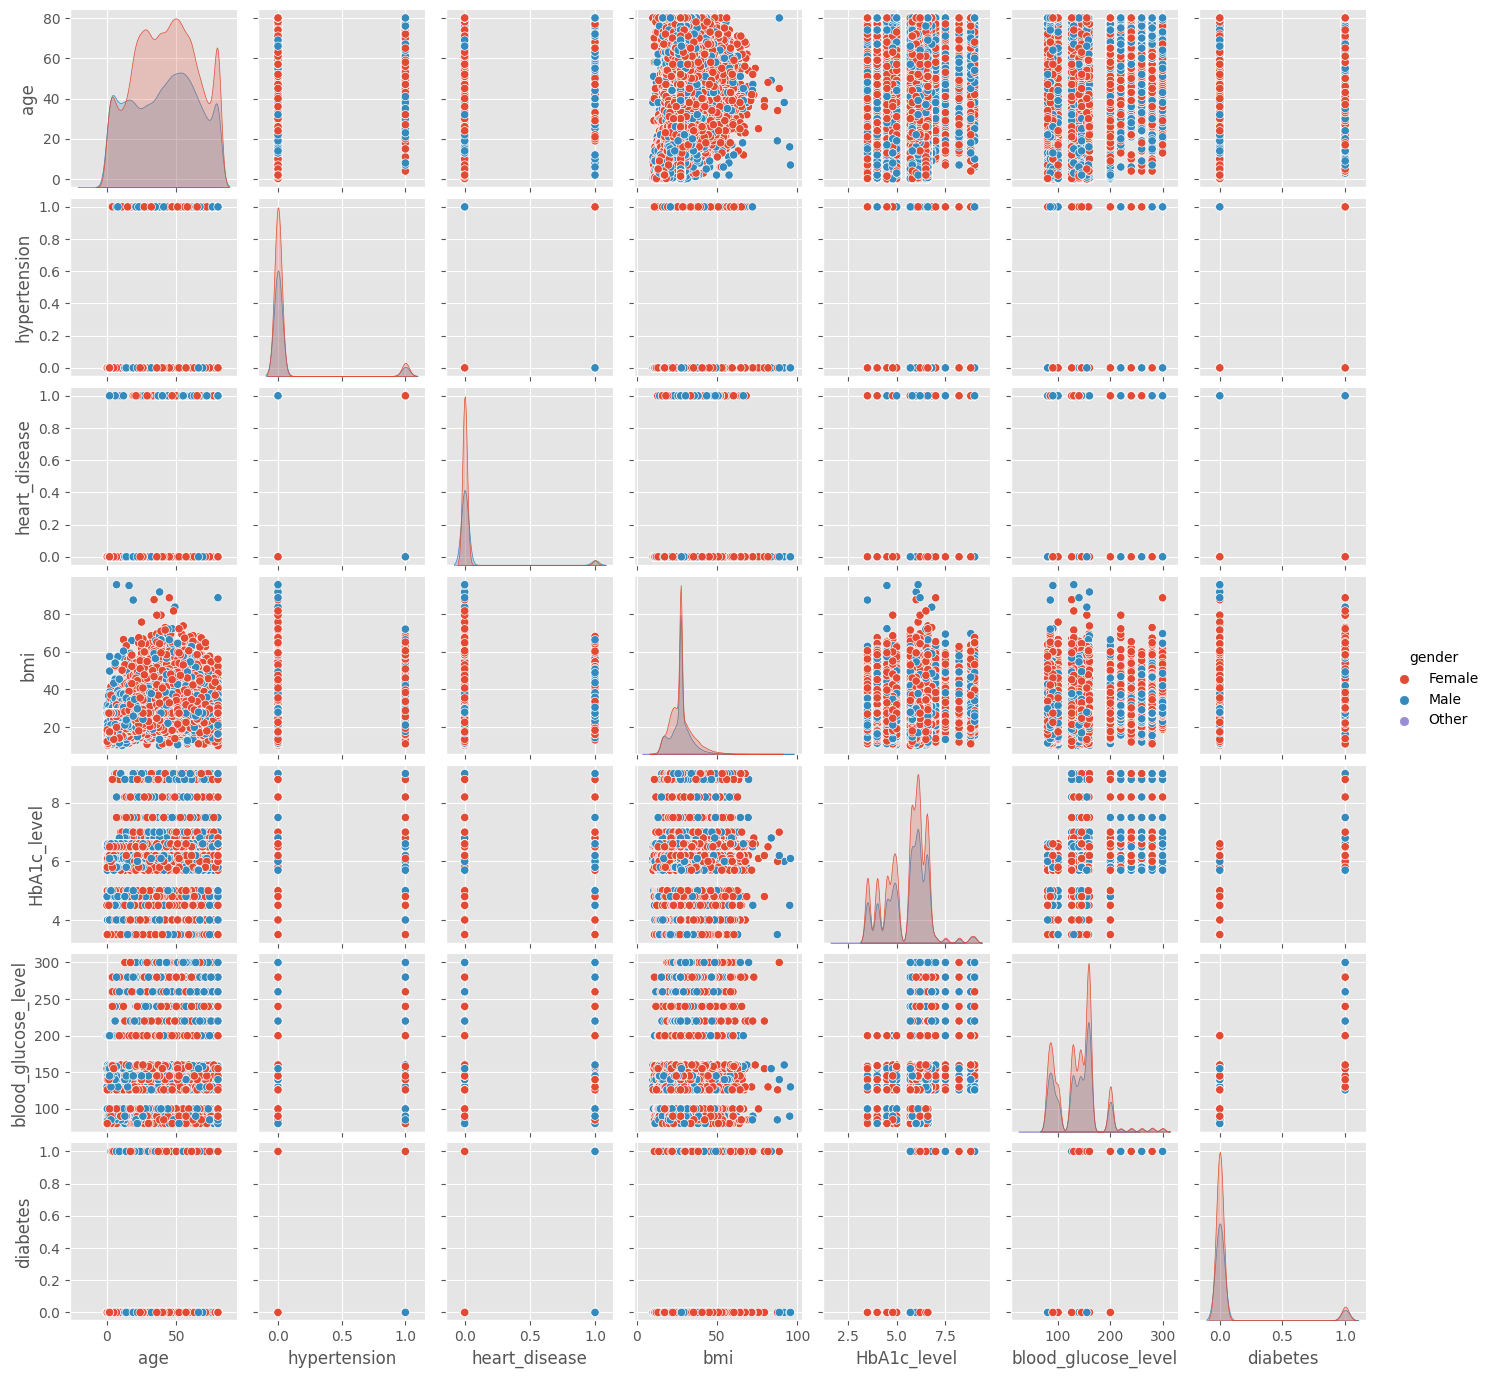

In [ ]:
#Pairplot of all columns w.r.to gender column
sns.pairplot(data, hue='gender', height=2)

In [ ]:
#Pie chart of all Categorical variables
#plt.figure(figsize=(12,8))
#plt.subplot(2,2,1)
plt.pie(gender.values(), labels = ['Females', 'Males', 'Other'],autopct='%1.2f%%');
plt.legend();
plt.title('Percentage of records w.r.t gender feature');

In [ ]:
#plt.subplot(2,2,2)
plt.pie(count_dict.values(), labels = ['No Info','current','ever','former','never','not current''],autopct='%1.2f%%');
plt.legend();
plt.title('Percentage of records w.r.t smoking habit feature');

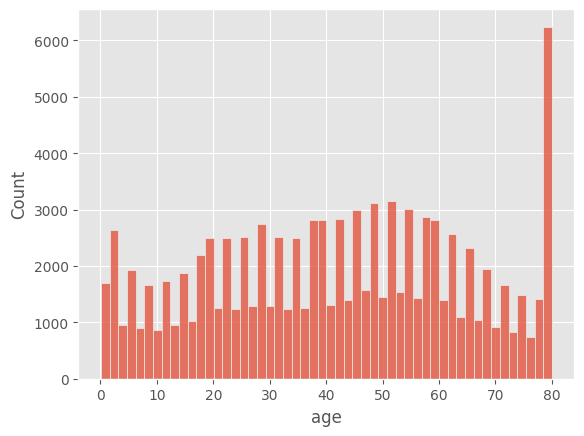

In [ ]:
#Histogram of all Numerical variables
sns.histplot(x='age', data=data, )
plt. show()

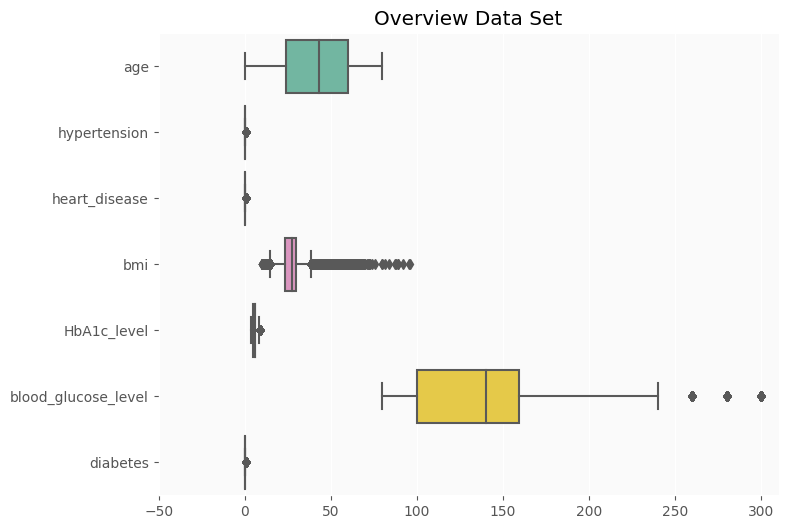

In [61]:
#Boxplot
plt.style.use('ggplot') # Using ggplot2 style visuals
f, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('#fafafa')
ax.set(xlim=(-50, 310))
#plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = data,
  orient = 'h',
  palette = 'Set2')


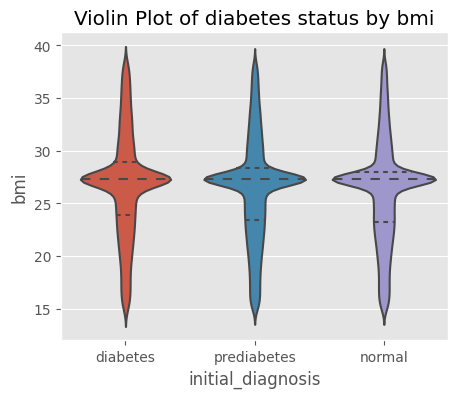

In [82]:
#sns.violinplot(x="diabetes", y="bmi", data=data)
plt.figure(figsize=(5, 4))
sns.violinplot(x="initial_diagnosis", y="bmi", data=data, inner="quartile")
plt.title("Violin Plot of diabetes status by bmi")
plt.show()


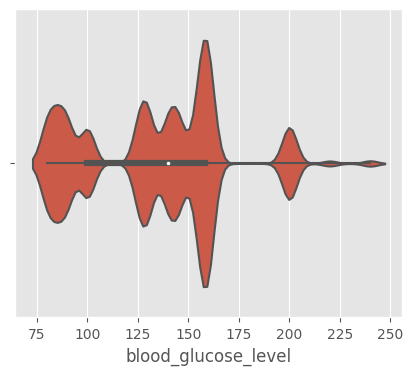

In [85]:
# as we see we have many outliers from visualization, we want to remove it:
# 1. frist calculation IQR
IQR = data['blood_glucose_level'].quantile(0.75) - data['blood_glucose_level'].quantile(0.25)

# determine the upper and lower boundries :
upper_boundry = data['blood_glucose_level'].quantile(0.75) + (IQR*1.5)
lower_boundry = data['blood_glucose_level'].quantile(0.25) - (IQR*1.5)

# removing outliers :
data = data[data['blood_glucose_level'] <= upper_boundry]
data = data[data['blood_glucose_level'] >= lower_boundry]

plt.figure(figsize=(5, 4))
sns.violinplot(data = data, x = 'blood_glucose_level');
plt.show()

Old Shape:  (91239, 10)
New Shape:  (91239, 10)


<Axes: xlabel='blood_glucose_level'>

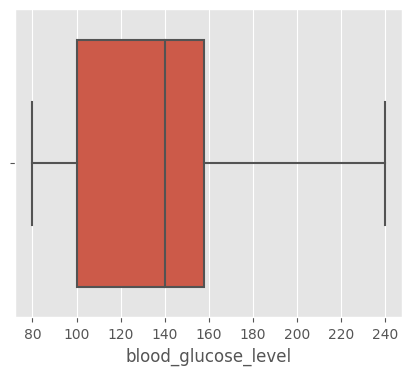

In [86]:
# Outlier removal
# IQR
Q1 = np.percentile(data['blood_glucose_level'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['blood_glucose_level'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", data.shape)
# Upper bound
upper = np.where(data['blood_glucose_level'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['blood_glucose_level'] <= (Q1-1.5*IQR))
# Removing the Outliers
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
print("New Shape: ", data.shape)
plt.figure(figsize=(5, 4))
sns.boxplot(x='blood_glucose_level', data=data)

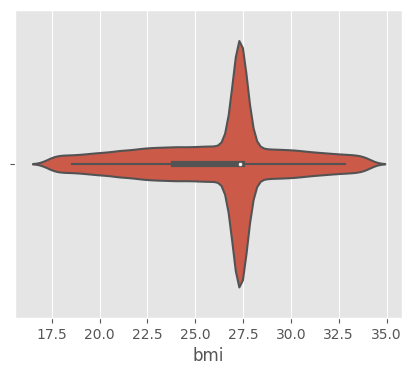

In [88]:
# as we see we have many outliers from visualization, we want to remove it:
# 1. frist calculation IQR
IQR = data['bmi'].quantile(0.75) - data['bmi'].quantile(0.25)

# determine the upper and lower boundries :
upper_boundry = data['bmi'].quantile(0.75) + (IQR*1.5)
lower_boundry = data['bmi'].quantile(0.25) - (IQR*1.5)

# removing outliers :
data = data[data['bmi'] <= upper_boundry]
data = data[data['bmi'] >= lower_boundry]

plt.figure(figsize=(5, 4))
sns.violinplot(data = data, x = 'bmi');

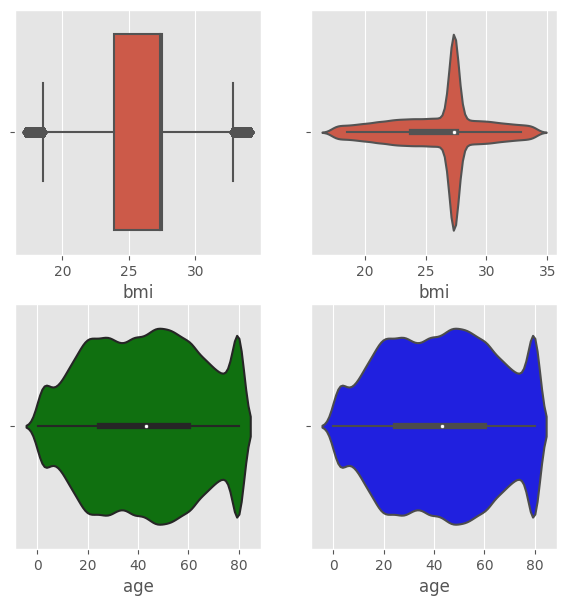

In [144]:
#Boxplot & ViolinPlot of bmi:
plt.figure(figsize = [7,7]);

plt.subplot(2,2,1);
sns.boxplot(data = data, x = 'bmi');

plt.subplot(2,2,2);
sns.violinplot(data = data, x = 'bmi',hue='gender');

plt.subplot(2,2,3);
sns.violinplot(data = data, x = 'age',color='green', marker='o');

plt.subplot(2,2,4);
sns.violinplot(data = data, x = 'age',color='blue', marker='o');

In [ ]:
# Outlier removal
# IQR
Q1 = np.percentile(data['bmi'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['bmi'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", data.shape)
# Upper bound
upper = np.where(data['bmi'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['bmi'] <= (Q1-1.5*IQR))
# Removing the Outliers
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
print("New Shape: ", data.shape)
sns.boxplot(x='bmi', data=data)

In [102]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes',
       'initial_diagnosis'],
      dtype='object')

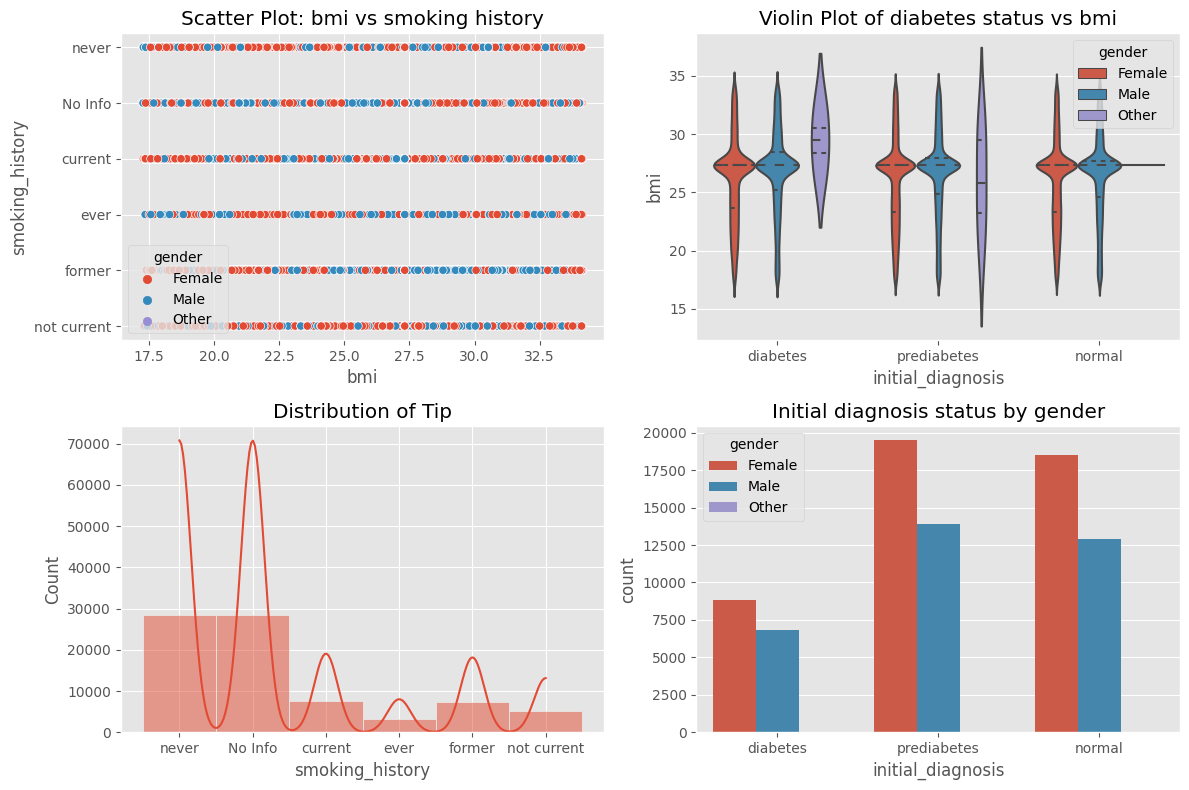

In [131]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot 1: Scatter plot of bmi vs smoking history
sns.scatterplot( x="bmi", y='smoking_history', data=data, hue='gender', ax=axes[0, 0])
axes[0, 0].set_title('Scatter Plot: bmi vs smoking history')

# Plot 2: Violin plot of diabetes status vs bmi
sns.violinplot(x="initial_diagnosis", y="bmi", data=data, inner="quartile",hue='gender',ax=axes[0, 1])
axes[0, 1].set_title('Violin Plot of diabetes status vs bmi')

# Plot 3: Distribution of tip
sns.histplot(data['smoking_history'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Tip')

# Plot 4: Count plot of day
sns.countplot(x='initial_diagnosis', data=data, hue='gender',ax=axes[1, 1])
axes[1, 1].set_title('Initial diagnosis status by gender')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

2. bmi vs diabetes

BMI

* Body mass index is a measure of body fat based on height and weight that applies to adult men and women.
* it is the weight in kilograms divided by height in meters squared

If BMI	=< 18.5	Category Underweight

If BMI 18.5 – 24.9	Category Normal

If BMI 25 – 29.9	Category Overweight

If BMI >= 30	Category Obesity

Reference: https://www.cdc.gov/diabetes/basics/getting-tested.html

In [145]:
#New Categorical feature 'weight_type' a.c.to bmi values
weight_type = []

for value in data['bmi']:
    if value <= 18.5:
        weight_type.append('underweight')

    elif (18.5 < value) and (value <= 24.9):
        weight_type.append('normal')

    elif (24.9 < value) and (value <= 29.9):
        weight_type.append('overweight')

    elif (value > 29.9):
        weight_type.append('obesity')

data['weight_type'] = weight_type

In [146]:
data.sample(4)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,initial_diagnosis,weight_type
51419,Male,41.0,0,0,No Info,27.32,4.8,200,0,normal,overweight
22757,Male,12.0,0,0,No Info,24.96,5.8,155,0,prediabetes,overweight
52830,Female,80.0,1,0,No Info,30.62,6.2,160,0,prediabetes,obesity
30233,Male,5.0,0,0,No Info,18.71,5.8,159,0,prediabetes,normal


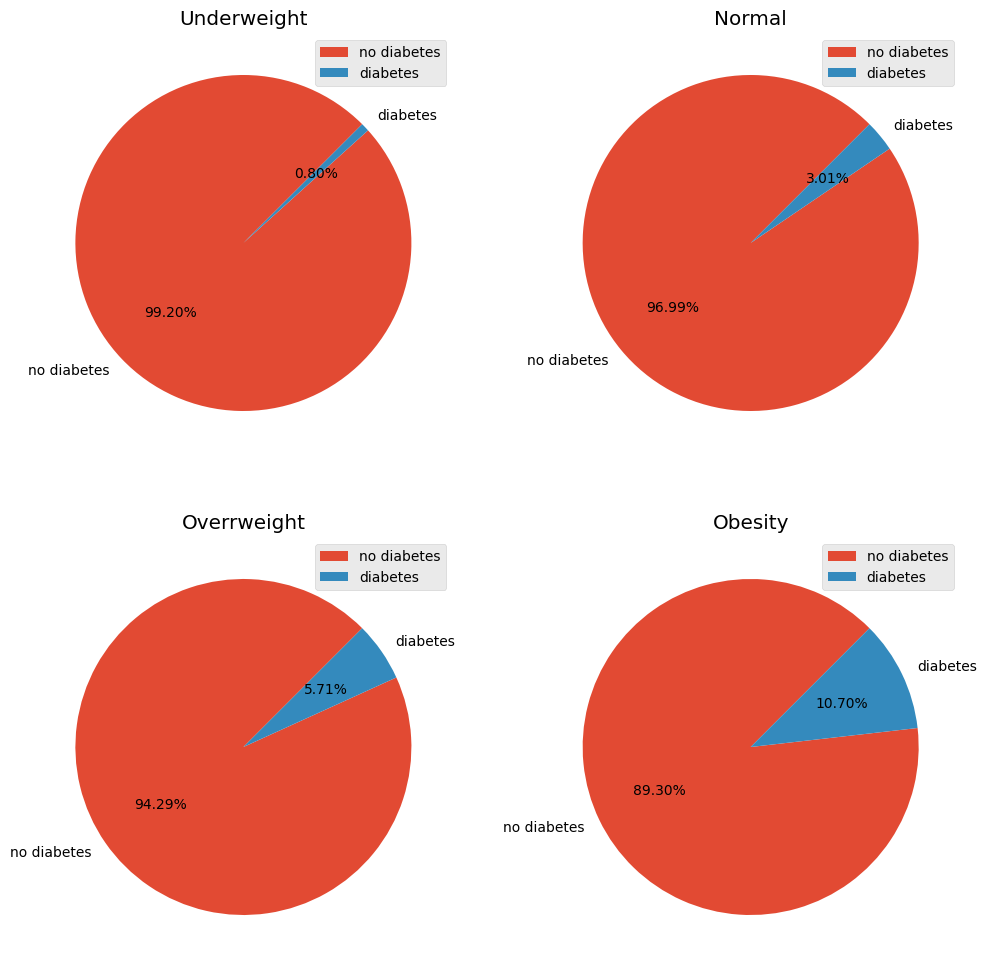

In [147]:
# drow pie chart for each ['weight_type']
plt.figure(figsize = [12,12]);

plt.subplot(2,2,1);
plt.pie(data[data['weight_type'] == 'underweight']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%', startangle = 45);
plt.title('Underweight')
plt.legend();

plt.subplot(2,2,2);
plt.pie(data[data['weight_type'] == 'normal']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('Normal')
plt.legend();

plt.subplot(2,2,3);
plt.pie(data[data['weight_type'] == 'overweight']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('Overrweight')
plt.legend();

plt.subplot(2,2,4);
plt.pie(data[data['weight_type'] == 'obesity']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('Obesity')
plt.legend();

3. blood_glucose_level vs diabetes


* If blood_glucose_level	 =< 99	Category is normal
* If blood_glucose_level	 100 – 125	Category is Prediabetes
*If blood_glucose_level	 >= 126	Category is Diabetes

Resources :

https://my.clevelandclinic.org/health/diagnostics/12363-blood-glucose-test
https://www.cdc.gov/diabetes/basics/getting-tested.html

In [149]:
#New Categorical feature 'sugar_test' a.c.to blood_glucose_level values
sugar_test = []

for value in data['blood_glucose_level']:
    if value <= 99:
        sugar_test.append('normal')

    elif (99 < value) and (value <= 125):
        sugar_test.append('prediabetes')

    elif (value > 125):
        sugar_test.append('diabetes')

data['sugar_test'] = sugar_test

In [154]:
data.sample(7)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,initial_diagnosis,weight_type,sugar_test
54724,Female,62.0,0,0,never,25.68,6.1,126,0,prediabetes,overweight,diabetes
49959,Female,52.0,0,0,former,21.85,6.5,155,0,diabetes,normal,diabetes
81387,Female,28.0,0,0,never,19.00,6.0,145,0,prediabetes,normal,diabetes
68425,Male,22.0,0,0,No Info,27.32,6.0,130,0,prediabetes,overweight,diabetes
36563,Male,18.0,0,0,No Info,27.32,5.7,155,0,prediabetes,overweight,diabetes
11280,Female,21.0,0,0,No Info,21.95,6.2,80,0,prediabetes,normal,normal
75318,Male,18.0,0,0,No Info,25.35,4.5,85,0,normal,overweight,normal


In [155]:
data['blood_glucose_level'].value_counts()

140    6365
130    6358
126    6324
160    6307
159    6302
145    6267
200    6234
155    6164
80     5923
90     5893
100    5852
158    5825
85     5704
240     444
220     426
Name: blood_glucose_level, dtype: int64

In [156]:
data['sugar_test'].value_counts()

diabetes       57016
normal         17520
prediabetes     5852
Name: sugar_test, dtype: int64

In [157]:
#Crosstab of sugar_test and diabetes
pd.crosstab(data.sugar_test,data.diabetes,margins=True, margins_name="Total", normalize = False).style.background_gradient(cmap='summer_r')

diabetes,0,1,Total
sugar_test,,,
diabetes,52585,4431,57016
normal,17520,0,17520
prediabetes,5852,0,5852
Total,75957,4431,80388


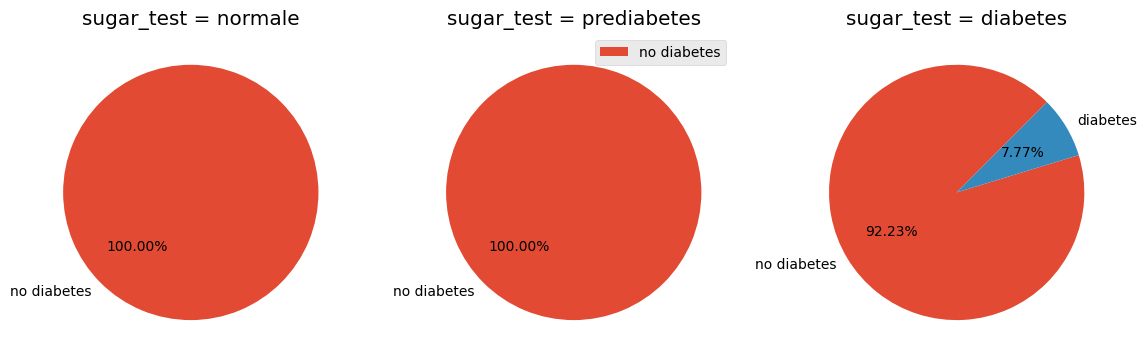

In [153]:
# drow pie chart for each ['weight_type']
plt.figure(figsize = [14,8]);

plt.subplot(1,3,1);
plt.pie(data[data['sugar_test'] == 'normal']['diabetes'].value_counts().values, labels = ['no diabetes'],
        autopct='%1.2f%%',startangle = 45);
plt.title('sugar_test = normale');

plt.subplot(1,3,2);
plt.pie(data[data['sugar_test'] == 'prediabetes']['diabetes'].value_counts().values, labels = ['no diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('sugar_test = prediabetes');
plt.legend();

plt.subplot(1,3,3);
plt.pie(data[data['sugar_test'] == 'diabetes']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%', startangle = 45);
plt.title('sugar_test = diabetes');

# 5. statistical test

# 6. ML models